# Checking Out Dataset

#### This dataset is for all electric vehicles (plug-in hybrid or battery electric) that were registered in the state of Washington from 1997 to 2024. (Does not encompass entire United States unfortunately)


### Some Data Science Questions

Leigh
- Is the rate of growth of electric cars changing? (faster, slower, staying the same?)
- What is the change in the average range per year? Per Manufactuer?

Michael
- Compare sales of electric cars across Washington state Make color coded map by county?


In [1]:
import pandas as pd

In [2]:
# Loading data
df = pd.read_csv('./data/us_car_data.csv')
df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134469,King,Yarrow Point,WA,98004,2020,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,330,0,48,124776627,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024100,-122.201905,47.613850
134470,King,Burien,WA,98168,2021,TESLA,MODEL Y,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,33,142857676,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033027100,-122.286460,47.476130
134471,Pierce,Gig Harbor,WA,98335,2022,TESLA,MODEL S,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,26,220157724,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072407,-122.583545,47.323449
134472,Grant,Ephrata,WA,98823,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,13,223872596,PUD NO 2 OF GRANT COUNTY,53025010402,-119.555130,47.319360



-Lots of redundant location data -> Should try to utilize that for an interesting map

-The price data seems to be mostly 0s, so that column will not be relevant to look into further

-Columns of interest seem to be `Model Year`, `Make`, `Model`, `Electric Vehicle Type`, `Electric Range`, and
the various location data columns.


In [3]:
# Subsetted dataframe to only BEVs for some analysis
bev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle   ']
bev_df
#print(134474 * 0.77)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134468,Snohomish,Edmonds,WA,98020,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,308,0,32,3315315,PUGET SOUND ENERGY INC,53061050700,-122.375070,47.808070
134469,King,Yarrow Point,WA,98004,2020,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,330,0,48,124776627,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024100,-122.201905,47.613850
134470,King,Burien,WA,98168,2021,TESLA,MODEL Y,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,33,142857676,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033027100,-122.286460,47.476130
134471,Pierce,Gig Harbor,WA,98335,2022,TESLA,MODEL S,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,26,220157724,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072407,-122.583545,47.323449


In [4]:
# This is an interesting dataset looking at how the mean range changed, seems like there might be some 0s
# the dataset though
# Need to filter by Plug-in hybrid as well
print(bev_df.groupby('Model Year')['Electric Range'].describe())
print(bev_df.groupby('Model Year')['Electric Range'].median())



              count        mean        std    min    25%    50%    75%    max
Model Year                                                                   
1997            1.0   39.000000        NaN   39.0   39.0   39.0   39.0   39.0
1998            1.0   58.000000        NaN   58.0   58.0   58.0   58.0   58.0
1999            4.0   74.000000   0.000000   74.0   74.0   74.0   74.0   74.0
2000            9.0   58.000000   0.000000   58.0   58.0   58.0   58.0   58.0
2002            2.0   95.000000   0.000000   95.0   95.0   95.0   95.0   95.0
2003            1.0   95.000000        NaN   95.0   95.0   95.0   95.0   95.0
2008           19.0  220.000000   0.000000  220.0  220.0  220.0  220.0  220.0
2010           20.0  245.000000   0.000000  245.0  245.0  245.0  245.0  245.0
2011          740.0   74.658108  16.833761   56.0   73.0   73.0   73.0  245.0
2012          789.0  103.790875  70.813282   56.0   73.0   73.0   73.0  265.0
2013         2945.0  110.501188  58.267789   68.0   75.0   75.0 

In [5]:
model20201_df = df[df['Model Year'] == 2021]
model20201_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
7,Snohomish,Edmonds,WA,98026,2021,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,18,0,21,138909032,PUGET SOUND ENERGY INC,53061050300,-122.335685,47.803720
20,Snohomish,Lake Stevens,WA,98258,2021,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,18,0,44,170340453,PUGET SOUND ENERGY INC,53061052607,-122.112065,48.004345
33,Whitman,Pullman,WA,99163,2021,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,29,0,9,167261251,AVISTA CORP,53075000601,-117.179120,46.730885
49,Skagit,Anacortes,WA,98221,2021,BMW,X3,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,17,0,40,144921822,PUGET SOUND ENERGY INC,53057940600,-122.615305,48.501275
124,Island,Langley,WA,98260,2021,TESLA,MODEL Y,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,151225896,PUGET SOUND ENERGY INC,53029972000,-122.408015,48.035570


In [6]:
%pip install contextily


Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt


<Axes: xlabel='Longitude', ylabel='latitude'>

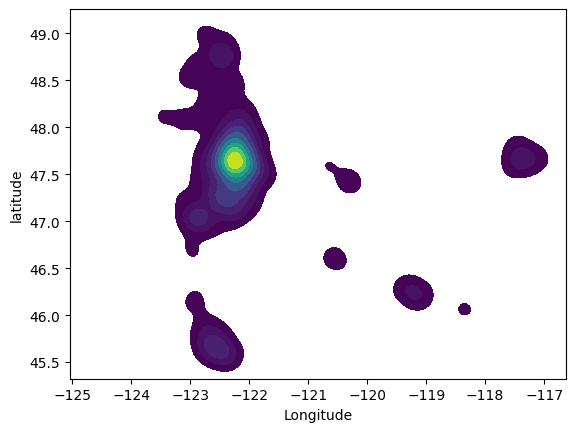

In [9]:
sns.kdeplot(x='Longitude', y='latitude', data=bev_df, fill=True, cmap='viridis')

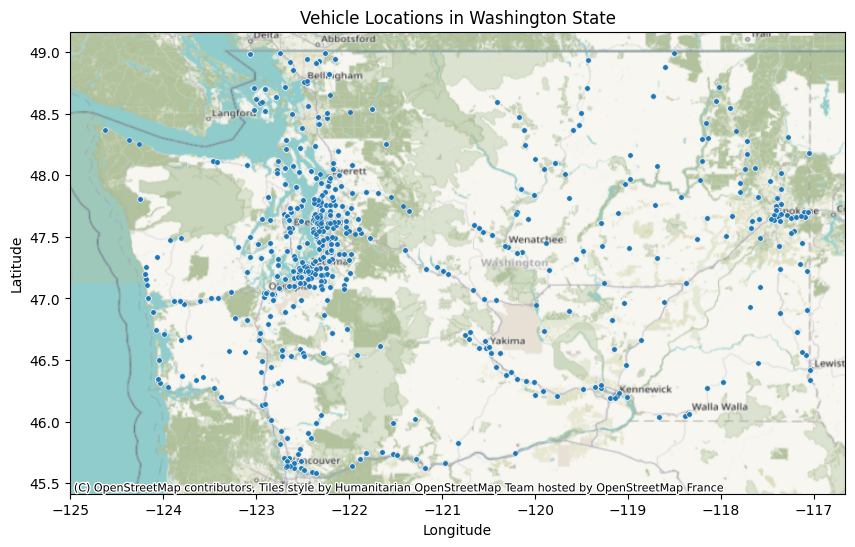

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Longitude', y='latitude', data=bev_df, s=15)
ctx.add_basemap(ax, crs="EPSG:4326")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Locations in Washington State')
plt.show()


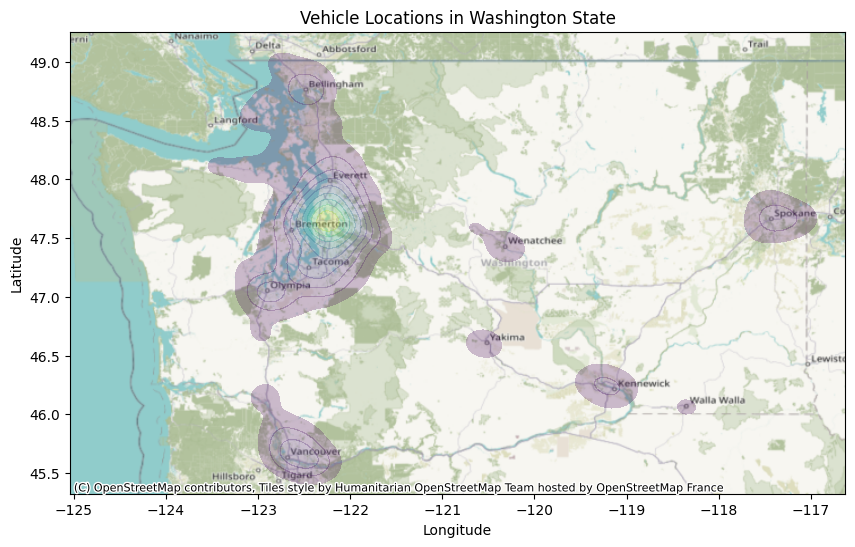

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(x='Longitude', y='latitude', data=bev_df, fill=True, cmap='viridis', alpha=0.25)
ctx.add_basemap(ax, crs="EPSG:4326")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Locations in Washington State')
plt.show()
